#!/usr/bin/env python
# coding: utf-8

# **심화도전1**
# ### **boston house prices 데이터를 이용한 <span style="color:darkgreen"> AI 예측</span>문제 **
# ---

# #### Boston의 지역특성과 가격 데이터를 이용하여 , Boston 집값을 예측하는 AI문제입니다. 
# #### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
# #### (boston house prices 데이터 : sklearn 내장 연습용 데이터셋 사용)
# 
#  - 데이터 : 회귀(수치)
#  - 모델 : 다중 회귀 분석 심화(선형, lidge, Lasso, elastic,), DeepLearning
#  - 주요 전처리 : 분석 Column 추가, 표준화(standardization), min-max Scaling
#  - 주요 학습 내용 : 다중 회귀 분석 심화 내용, 회귀 예측 모델 생성(input, output 처리, 손실함수 등)
# ---

# **boston house prices 데이터 컬럼 설명 (sklearn 내장 연습용 데이터셋)**
# - CRIM : 자치시(town)별 1인당 범죄율
# - ZN : 25,000 평방피트를 초과하는 거주지역의 비율
# - INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
# - CHAS : 찰스강 근처는 1, 그렇지 않으면 0
# - NOX : 10ppm당 일산화질소 농도
# - RM : 주택 1가구당 평균 방의 개수
# - AGE : 1940년 이전에 건축된 소유주택의 비율
# - DIS : 5개의 보스턴 직업센터까지의 접근성 지수
# - RAD : 방사형 도로까지의 접근성 지수
# - TAX : 10,000달러 당 재산 새율
# - PTRATIO : 자치시(town)별 학생/교사 비율
# - B : 1000(Bk-0.63)^2, Bk는 자치시별 흑인의 비율
# - LSTAT : 모집단의 하위계층 비율
# - MEDV : 집주인이 실제 거주하는 집들의 주택가격 중앙값 (단위 $1,000)

# ---
# ---
# > **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행해주시기 바랍니다.**<br>
# > - AIDU 사용을 위한 AIDU 환경변수를 선언을 하는 코드. <span style="color:darkgreen"></span><br>
# ---


# ### **Q1. Pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
# ---

# In[26]:

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data # 인풋으로 사용할 데이터
y = boston.target # 아웃풋, target으로 사용할 데이터
col_names = boston.feature_names # 인풋으로 사용할 데이터의 컬럼별 이름들


In [5]:

import pandas as pd


# ### **Q2. Numpy를 np로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
# ---

In [6]:

import numpy as np


# ### **Q3. 인풋데이터(x)와 인풋데이터 컬럼명(col_names)를 이용하여 인풋데이터의 dataframe을 제작하시기 바랍니다.**
# * **
# - 데이터 프레임의 변수 명은 bhp 로 한다.
# ---


In [7]:

bhp = pd.DataFrame(boston.data, columns= col_names)


# ### **Q4. 데이터 프레임 bhp에 새로운 컬럼 MEDV를 제작하시기 바랍니다.**
# * **
# - 컬럼의 값은 y를 사용한다. (주택 가격)
# ---


In [8]:

bhp['MEDV'] = y
bhp


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# ### **Q5. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
# * **
# - x와 y를 이용해도 좋지만, 데이터 프레임 bhp를 이용하여 분할하면 이후 코드가 편리해진다.
# - train : test = 8.5 : 1.5
# - 컬럼 CHAS 를 이용하여 stratify 하게 분할한다.
# - 변수명 규칙은 다음과 같다.
#     * x_train, y_train
#     * x_test, y_test
# - random state, seed 등은 2021로 설정한다.
# 
# ---

In [9]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify = bhp['CHAS'], random_state=2021)



# ### **Q6. 트레이닝셋을 트레이닝셋 / 벨리데이션셋으로 분할하시기 바랍니다.**
# * **
# - x_train과 y_train을 이용한다.
# - train : valid = 7 : 1.5
# - x_train의 컬럼 CHAS 를 이용하여 stratify 하게 분할한다.
# - 변수명 규칙은 다음과 같다.
#     * x_train, y_train
#     * x_valid, y_valid
# - random state, seed 등은 2021로 설정한다.
# 
# ---


In [10]:

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=3/14, stratify = bhp['CHAS'], random_state=2021)
pd.DataFrame(x_valid)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
1,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
2,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
3,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
4,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98
105,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
106,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33
107,2.01019,0.0,19.58,0.0,0.605,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70


# ### **Q7. 데이터의 NOX와 RM은 민맥스(min-max) 스케일링 하시기 바랍니다.**
# * **
# - 모든 스케일링 규칙은 트레이닝 셋을 이용하여 정한다.
# - 트레이닝셋, 벨리데이션셋, 테스트셋 전부 스케일링 한다.
# ---


In [11]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(bhp[['NOX']])
nox = scaler.transform(bhp[['NOX']])
nox1 = pd.DataFrame(nox, columns=['NOX'])

scaler.fit(bhp[['RM']])
rm = scaler.transform(bhp[['RM']])
rm1 = pd.DataFrame(rm, columns=['RM'])

bhp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# ### **Q8. 데이터의 RAD와 B는 표준화(standardization) 스케일링 하시기 바랍니다.**
# * **
# - 모든 스케일링 규칙은 트레이닝 셋을 이용하여 정한다.
# - 트레이닝셋, 벨리데이션셋, 테스트셋 전부 스케일링 한다.
# ---

In [12]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(bhp[['RAD']])
rad = scaler.transform(bhp[['RAD']])
rad1 = pd.DataFrame(rad, columns=['RAD'])
rad1
 
scaler.fit(bhp[['B']])
b = scaler.transform(bhp[['B']])
b1 = pd.DataFrame(b, columns=['B'])

bhp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0



# ### **Q9. 트레이닝 셋을 이용하여 선형회귀 모델을 학습시키시기 바랍니다.**
# * **
# - linear regression의 normal equation으로 coefficient들을 추정한다.
# - 학습된 모델은 lr 에 선언해둔다.
# ---

In [13]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.coef_

array([-1.07285469e-01,  5.75274591e-02,  3.14352130e-02,  2.79428436e+00,
       -1.93108840e+01,  3.74783954e+00, -1.95597877e-03, -1.69375865e+00,
        3.55031259e-01, -1.38096633e-02, -9.18197448e-01,  1.01474084e-02,
       -5.62540633e-01])

# ### **Q10. 트레이닝 셋을 이용하여 ridge regression 모델을 학습시키시기 바랍니다.**
# * **
# - regularization term의 penalty intensity 는 5로 설정한다.
# - 학습된 모델은 ridge 에 선언해둔다.
# ---


In [14]:

from sklearn.linear_model import Ridge
ridge =Ridge(alpha = 5)
ridge.fit(x_train, y_train)
ridge.coef_


array([-0.09897373,  0.05972486, -0.03516517,  2.03645208, -3.72398864,
        3.7068166 , -0.01366585, -1.45956398,  0.33258459, -0.0159613 ,
       -0.7662343 ,  0.01057655, -0.58904078])


# ### **Q11. 트레이닝 셋을 이용하여 lasso regression 모델을 학습시키시기 바랍니다.**
# * **
# - regularization term의 penalty intensity 는 1로 설정한다.
# - 학습된 모델은 lasso 에 선언해둔다.
# ---

In [15]:

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
lasso.coef_

array([-0.06532842,  0.05779456, -0.        ,  0.        , -0.        ,
        1.01312353,  0.01837977, -0.84343152,  0.32939515, -0.01802046,
       -0.69441472,  0.00913147, -0.78879269])

# ### **Q12. 트레이닝 셋을 이용하여 elastic net regression 모델을 학습시키시기 바랍니다.**
# * **
# - regularization term의 penalty intensity는 아래와 같이 설정한다
#     * l1 penalty intensity : 0.5
#     * l2 penalty intensity : 3 
# - 학습된 모델은 elastic 에 선언해둔다.
# ---


In [16]:
from sklearn.linear_model import ElasticNet
#alpha : a + b를 의미. 여기서 a란, L1으로 얼마나 정규화시킬지의 값, b란, L2로 얼마나 정규화시킬지의 값을 의미
#l1_ratio : "L1의 정규화값 / (L1의 정규화값 + L2의 정규화값)"을 의미. 만약 0.8이라면 8/10 이기 때문에 L1은 8만큼, L2는 2만큼 정규화시킴을 의미
elasticnet = ElasticNet(alpha=3.5, l1_ratio=0.8571, random_state=2021)
elasticnet.fit(x_train, y_train)


ElasticNet(alpha=3.5, l1_ratio=0.8571, random_state=2021)

# ### **Q13. 벨리데이션 셋을 이용하여 학습된 네 모델의 성능을 출력하시기 바랍니다.**
# * **
# - 평가를 위한 손실함수는 rmse를 이용한다.
# ---

In [17]:

from sklearn.metrics import mean_squared_error
y_valid_pred1=lr.predict(x_valid)
valid_rmse_lr=np.sqrt(mean_squared_error(y_valid, y_valid_pred1))
print("lr Valid RMSE:%.4f" % valid_rmse_lr)

y_valid_pred2=ridge.predict(x_valid)
valid_rmse_ridge=np.sqrt(mean_squared_error(y_valid, y_valid_pred2)) 
print("ridge Valid RMSE:%.4f" % valid_rmse_ridge)

y_valid_pred3=lasso.predict(x_valid)
valid_rmse_lasso=np.sqrt(mean_squared_error(y_valid, y_valid_pred3)) 
print("lasso Valid RMSE:%.4f" % valid_rmse_lasso)

y_valid_pred4=elasticnet.predict(x_valid)
valid_rmse_elastic=np.sqrt(mean_squared_error(y_valid, y_valid_pred4)) 
print("elastic net Valid RMSE:%.4f" % valid_rmse_elastic)


lr Valid RMSE:4.1256
ridge Valid RMSE:4.1344
lasso Valid RMSE:4.3824
elastic net Valid RMSE:4.8375


# ### **Q14. 테스트 셋을 이용하여 학습된 네 모델의 성능을 출력하시기 바랍니다.**
# * **
# - 손실함수는 mean absolute error를 이용한다.
# ---


In [18]:

from sklearn.metrics import mean_absolute_error

y_test_pred1=lr.predict(x_test)
test_mae_lr=mean_absolute_error(y_test, y_test_pred1)
print("lr Test MAE:%.4f" % test_mae_lr)

y_test_pred2=ridge.predict(x_test)
test_mae_ridge=mean_absolute_error(y_test, y_test_pred2) 
print("ridge Test MAE:%.4f" % test_mae_ridge)

y_test_pred3=lasso.predict(x_test)
test_mae_lasso=mean_absolute_error(y_test, y_test_pred3) 
print("lasso Test MAE:%.4f" % test_mae_lasso)

y_test_pred4=elasticnet.predict(x_test)
test_mae_elastic=mean_absolute_error(y_test, y_test_pred4) 
print("elasticNet Test MAE:%.4f" % test_mae_elastic)


lr Test MAE:3.3569
ridge Test MAE:3.2999
lasso Test MAE:3.5112
elasticNet Test MAE:3.9533



# ### **Q15. 테스트 셋에서 CHAS가 1일 때, 학습된 네 모델의 성능을 출력하시기 바랍니다.**
# * **
# - 손실함수는 mean absolute error를 이용한다.
# ---

In [19]:

for i in range(len(x_test)):
    x_test[i][3] = 1
from sklearn.metrics import mean_absolute_error

y_test_pred1=lr.predict(x_test)
test_mae_lr=mean_absolute_error(y_test, y_test_pred1) #훈련 데이터의 평가 점수
print("lr Test MAE:%.4f" % test_mae_lr)

y_test_pred2=ridge.predict(x_test)
test_mae_ridge=mean_absolute_error(y_test, y_test_pred2) #훈련 데이터의 평가 점수
print("ridge Test MAE:%.4f" % test_mae_ridge)

y_test_pred3=lasso.predict(x_test)
test_mae_lasso=mean_absolute_error(y_test, y_test_pred3) #훈련 데이터의 평가 점수
print("lasso Test MAE:%.4f" % test_mae_lasso)

y_test_pred4=elasticnet.predict(x_test)
test_mae_elastic=mean_absolute_error(y_test, y_test_pred4) #훈련 데이터의 평가 점수
print("elasticNet Test MAE:%.4f" % test_mae_elastic)

lr Test MAE:4.4820
ridge Test MAE:4.1692
lasso Test MAE:3.5112
elasticNet Test MAE:3.9533


In [20]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint


# ### **Q16. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
# * **
# - Tensorflow framework를 사용한다.
# - 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
#     * 2개 이상의 fully connected layer를 사용할 것
#     * FC layer뒤에는 batch normalization을 진행한다.
# - ModelCheckpoint 콜백으로 validation performance가 좋은 모델을 best_model.h5 파일로 저장한다.
# - 학습과정의 로그를 history에 선언하여 남긴다.
# - epochs는 200번을 진행한다.
# ---

In [21]:
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mse'])


modelpath = "best_model.h5"
checkpointer = ModelCheckpoint( filepath=modelpath, monitor='val_loss', verbose=1,
                               save_best_only=True)

history = model.fit(x_valid, y_valid, epochs=200, validation_split=0.2, callbacks=checkpointer)


C:\Users\admin\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
3/3 [==============================] - 1s 59ms/step - loss: 474.0322 - mse: 474.0322 - val_loss: 1234.7743 - val_mse: 1234.7743

Epoch 00001: val_loss improved from inf to 1234.77429, saving model to best_model.h5
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 460.9103 - mse: 460.9103 - val_loss: 1150.2759 - val_mse: 1150.2759

Epoch 00002: val_loss improved from 1234.77429 to 1150.27588, saving model to best_model.h5
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 451.0317 - mse: 451.0317 - val_loss: 1126.8429 - val_mse: 1126.8429

Epoch 00003: val_loss improved from 1150.27588 to 1126.84290, saving model to best_model.h5
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 443.2615 - mse: 443.2615 - val_loss: 1115.6985 - val_mse: 1115.6985

Epoch 00004: val_loss improved from 1126.84290 to 1115.69849, saving model to best_model.h5
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 437.950

3/3 [==============================] - 0s 7ms/step - loss: 352.7758 - mse: 352.7758 - val_loss: 616.0422 - val_mse: 616.0422

Epoch 00037: val_loss improved from 626.37512 to 616.04218, saving model to best_model.h5
Epoch 38/200
3/3 [==============================] - 0s 7ms/step - loss: 351.9684 - mse: 351.9684 - val_loss: 610.3032 - val_mse: 610.3032

Epoch 00038: val_loss improved from 616.04218 to 610.30322, saving model to best_model.h5
Epoch 39/200
3/3 [==============================] - 0s 7ms/step - loss: 345.7441 - mse: 345.7441 - val_loss: 602.4643 - val_mse: 602.4643

Epoch 00039: val_loss improved from 610.30322 to 602.46429, saving model to best_model.h5
Epoch 40/200
3/3 [==============================] - 0s 7ms/step - loss: 343.0330 - mse: 343.0330 - val_loss: 591.6640 - val_mse: 591.6640

Epoch 00040: val_loss improved from 602.46429 to 591.66400, saving model to best_model.h5
Epoch 41/200
3/3 [==============================] - 0s 8ms/step - loss: 339.1629 - mse: 339.1629 

3/3 [==============================] - 0s 6ms/step - loss: 207.0105 - mse: 207.0105 - val_loss: 341.5083 - val_mse: 341.5083

Epoch 00074: val_loss improved from 351.54211 to 341.50827, saving model to best_model.h5
Epoch 75/200
3/3 [==============================] - 0s 7ms/step - loss: 208.1751 - mse: 208.1751 - val_loss: 328.4815 - val_mse: 328.4815

Epoch 00075: val_loss improved from 341.50827 to 328.48151, saving model to best_model.h5
Epoch 76/200
3/3 [==============================] - 0s 7ms/step - loss: 197.1342 - mse: 197.1342 - val_loss: 321.9077 - val_mse: 321.9077

Epoch 00076: val_loss improved from 328.48151 to 321.90775, saving model to best_model.h5
Epoch 77/200
3/3 [==============================] - 0s 7ms/step - loss: 192.9412 - mse: 192.9412 - val_loss: 323.5445 - val_mse: 323.5445

Epoch 00077: val_loss did not improve from 321.90775
Epoch 78/200
3/3 [==============================] - 0s 7ms/step - loss: 188.4801 - mse: 188.4801 - val_loss: 312.6116 - val_mse: 312.6

3/3 [==============================] - 0s 7ms/step - loss: 65.7089 - mse: 65.7089 - val_loss: 143.2834 - val_mse: 143.2834

Epoch 00112: val_loss improved from 151.66870 to 143.28345, saving model to best_model.h5
Epoch 113/200
3/3 [==============================] - 0s 7ms/step - loss: 64.2162 - mse: 64.2162 - val_loss: 150.9948 - val_mse: 150.9948

Epoch 00113: val_loss did not improve from 143.28345
Epoch 114/200
3/3 [==============================] - 0s 7ms/step - loss: 61.5514 - mse: 61.5514 - val_loss: 153.7970 - val_mse: 153.7970

Epoch 00114: val_loss did not improve from 143.28345
Epoch 115/200
3/3 [==============================] - 0s 8ms/step - loss: 59.8123 - mse: 59.8123 - val_loss: 140.9748 - val_mse: 140.9748

Epoch 00115: val_loss improved from 143.28345 to 140.97478, saving model to best_model.h5
Epoch 116/200
3/3 [==============================] - 0s 7ms/step - loss: 57.2051 - mse: 57.2051 - val_loss: 124.1905 - val_mse: 124.1905

Epoch 00116: val_loss improved from 14


Epoch 00151: val_loss did not improve from 64.40625
Epoch 152/200
3/3 [==============================] - 0s 7ms/step - loss: 13.6586 - mse: 13.6586 - val_loss: 66.0444 - val_mse: 66.0444

Epoch 00152: val_loss did not improve from 64.40625
Epoch 153/200
3/3 [==============================] - 0s 7ms/step - loss: 11.9818 - mse: 11.9818 - val_loss: 65.5525 - val_mse: 65.5525

Epoch 00153: val_loss did not improve from 64.40625
Epoch 154/200
3/3 [==============================] - 0s 7ms/step - loss: 9.9958 - mse: 9.9958 - val_loss: 66.5667 - val_mse: 66.5667

Epoch 00154: val_loss did not improve from 64.40625
Epoch 155/200
3/3 [==============================] - 0s 7ms/step - loss: 13.3375 - mse: 13.3375 - val_loss: 66.2342 - val_mse: 66.2342

Epoch 00155: val_loss did not improve from 64.40625
Epoch 156/200
3/3 [==============================] - 0s 7ms/step - loss: 9.6553 - mse: 9.6553 - val_loss: 66.9842 - val_mse: 66.9842

Epoch 00156: val_loss did not improve from 64.40625
Epoch 157/2

3/3 [==============================] - 0s 7ms/step - loss: 7.1376 - mse: 7.1376 - val_loss: 53.8605 - val_mse: 53.8605

Epoch 00194: val_loss did not improve from 51.48405
Epoch 195/200
3/3 [==============================] - 0s 7ms/step - loss: 4.5258 - mse: 4.5258 - val_loss: 52.1489 - val_mse: 52.1489

Epoch 00195: val_loss did not improve from 51.48405
Epoch 196/200
3/3 [==============================] - 0s 7ms/step - loss: 3.5490 - mse: 3.5490 - val_loss: 50.7303 - val_mse: 50.7303

Epoch 00196: val_loss improved from 51.48405 to 50.73034, saving model to best_model.h5
Epoch 197/200
3/3 [==============================] - 0s 7ms/step - loss: 4.4371 - mse: 4.4371 - val_loss: 51.8281 - val_mse: 51.8281

Epoch 00197: val_loss did not improve from 50.73034
Epoch 198/200
3/3 [==============================] - 0s 7ms/step - loss: 8.2665 - mse: 8.2665 - val_loss: 54.4475 - val_mse: 54.4475

Epoch 00198: val_loss did not improve from 50.73034
Epoch 199/200
3/3 [=============================


# ### **Q17. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시기 바랍니다.**
# * **
# - 필요한 라이브러리가 있다면 따로 불러온다.
# - epochs에 따른 loss의 변화를 시각화 한다.
# - train loss와 validation loss를 전부 시각화하고, 구별가능해야 한다.
# - 그래프의 타이틀은 'Loss'로 표시한다.
# - x축에는 'epochs'라고 표시하고 y축에는 'MSE'라고 표시한다.
# ---

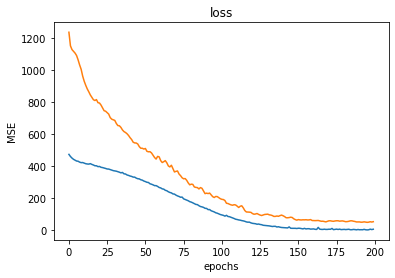

In [22]:

import matplotlib.pyplot as plt

h = history
plt.plot(h.history['mse'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel("MSE")
plt.show()

